## Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Load Dataset

In [49]:
df=pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


## EDA & Feature Engineering

In [50]:
df.ndim

2

In [51]:
df.shape

(235795, 56)

In [52]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [53]:
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [54]:
# Checking for the number of Categorical and Numerical Columns
categorical_columns=[column for column in df.columns if df[column].dtype=='object']
numerical_columns= [column for column in df.columns if column not in categorical_columns]

print(f'There are {len(categorical_columns)} :\n {categorical_columns}')

print(f'There are {len(numerical_columns)} :\n {numerical_columns}')

There are 5 :
 ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
There are 51 :
 ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [55]:
# Missing Values
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [56]:
for columns in categorical_columns:
    print(f'\n Number of unique values for {columns}: {len(df[columns].unique())}')
    # print()
    print(f'List of unique values: \n {df[columns].unique()} ')
    


 Number of unique values for FILENAME: 235795
List of unique values: 
 ['521848.txt' '31372.txt' '597387.txt' ... '622132.txt' '7503962.txt'
 '384822.txt'] 

 Number of unique values for URL: 235370
List of unique values: 
 ['https://www.southbankmosaics.com' 'https://www.uni-mainz.de'
 'https://www.voicefmradio.co.uk' ... 'https://www.nononsensedesign.be'
 'https://patient-cell-40f5.updatedlogmylogin.workers.dev/'
 'https://www.alternativefinland.com'] 

 Number of unique values for Domain: 220086
List of unique values: 
 ['www.southbankmosaics.com' 'www.uni-mainz.de' 'www.voicefmradio.co.uk'
 ... 'www.winchester.gov.uk' 'www.nononsensedesign.be'
 'www.alternativefinland.com'] 

 Number of unique values for TLD: 695
List of unique values: 
 ['com' 'de' 'uk' 'org' 'in' 'ie' 'hu' 'ru' 'gq' 'es' 'jp' 'guru' 'app'
 'io' 'club' 'fr' 'au' 'today' 'cloud' 'br' 'pt' 'co' 'lt' 'ca' 'xyz' 'sk'
 'pl' 'dk' 'dev' 'ga' 'edu' 'space' 'ws' '123' 'cf' 'rs' 'games' 'nl' 'me'
 'net' 'life' 'ua' 'id' 'm

In [60]:
round(df.query('TLD=="com"').groupby('label').size()/len(df[df['TLD']=='com']),1)

label
0    0.4
1    0.6
dtype: float64

<Axes: xlabel='label'>

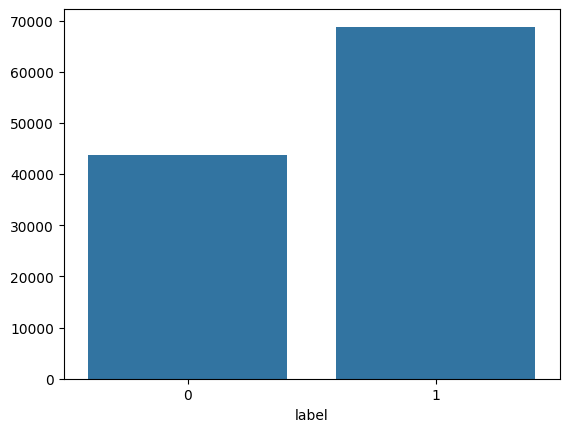

In [34]:
sns.barplot(df.query('TLD=="com"').groupby('label').size())

In [35]:
df[df['label']==1]['Domain']

0           www.southbankmosaics.com
1                   www.uni-mainz.de
2             www.voicefmradio.co.uk
3                www.sfnmjournal.com
4         www.rewildingargentina.org
                     ...            
235789       www.life-in-ecuador.com
235790        www.skincareliving.com
235791         www.winchester.gov.uk
235792       www.nononsensedesign.be
235794    www.alternativefinland.com
Name: Domain, Length: 134850, dtype: object

<Axes: xlabel='label', ylabel='URLLength'>

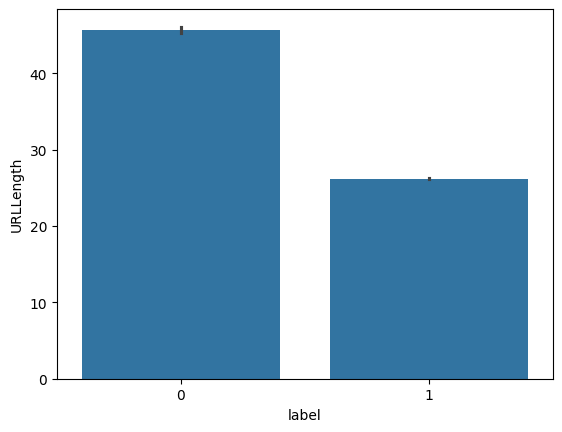

In [36]:
sns.barplot(data=df,x='label',y='URLLength')

<Axes: xlabel='label', ylabel='DomainLength'>

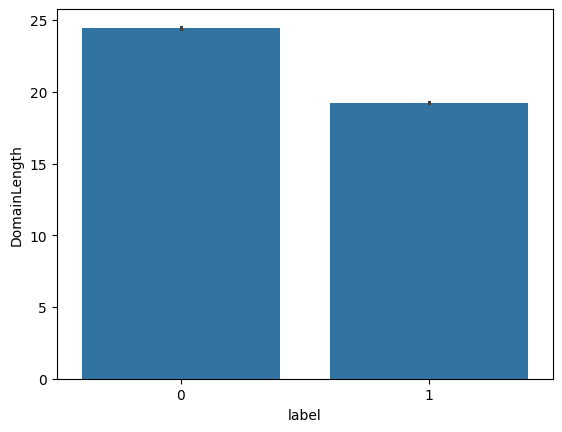

In [37]:
sns.barplot(data=df,x='label',y='DomainLength')

In [38]:
# plt.figure(figsize=(10,5))
df.corr(numeric_only=True)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,...,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,...,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,...,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,...,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,...,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,...,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,...,0.162323,0.062187,0.349530,0.128617,0.034470,0.176119,0.144543,0.050855,0.120841,0.469749
TLDLength,0.033339,0.152669,-0.011125,-0.053915,0.051438,0.386794,0.069818,1.000000,-0.162431,0.000974,...,0.023103,0.017689,-0.043484,-0.029074,-0.004249,-0.024109,-0.046451,-0.014442,-0.026486,-0.079159
NoOfSubDomain,0.071058,0.399157,0.084619,-0.058481,-0.482314,-0.250048,-0.081576,-0.162431,1.000000,0.015902,...,-0.024983,-0.016590,-0.006321,-0.009474,-0.001003,-0.010226,0.003108,0.001702,-0.001538,-0.005955
HasObfuscation,0.161980,0.041643,0.001239,-0.100159,-0.036231,-0.016577,-0.056108,0.000974,0.015902,1.000000,...,-0.009674,-0.002711,-0.014249,-0.012997,-0.002841,-0.015700,-0.016541,-0.004463,-0.013342,-0.052473


In [61]:
# Drop all catrgorical Columns
df.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD', 'Title','NoOfLettersInURL','NoOfDegitsInURL'],axis=1,inplace=True)
df.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


In [62]:
round(df.label.value_counts()/235795,4)

label
1    0.5719
0    0.4281
Name: count, dtype: float64

<Axes: xlabel='label', ylabel='count'>

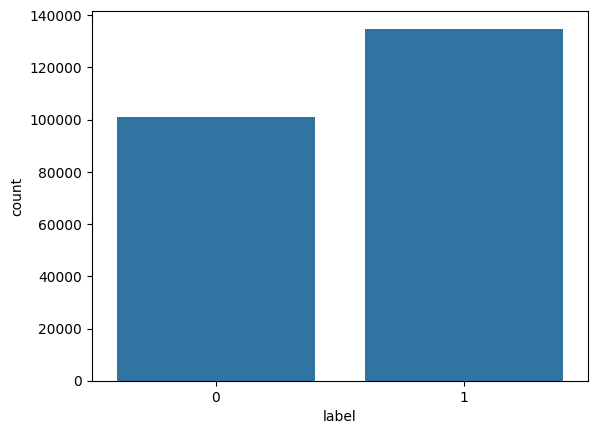

In [63]:
## Checking the distribution of the labels
sns.countplot(data=df,x='label')

In [64]:
X=df.drop('label',axis=1)
y=df['label']

In [65]:
# Splitting Data into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [69]:
X_train

array([[8.21827745e-04, 6.93069307e-02, 0.00000000e+00, ...,
        1.87998195e-04, 0.00000000e+00, 6.52395515e-04],
       [1.64365549e-03, 1.28712871e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80802104e-03, 1.38613861e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.13675214e-03, 1.58415842e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80802104e-03, 1.28712871e-01, 0.00000000e+00, ...,
        3.04557076e-03, 0.00000000e+00, 6.52395515e-04],
       [2.13675214e-03, 1.48514851e-01, 0.00000000e+00, ...,
        3.75996390e-05, 0.00000000e+00, 1.22324159e-04]])

# **MODELLING**
* KNN
* Logistic Regression

### KNN

KNN Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



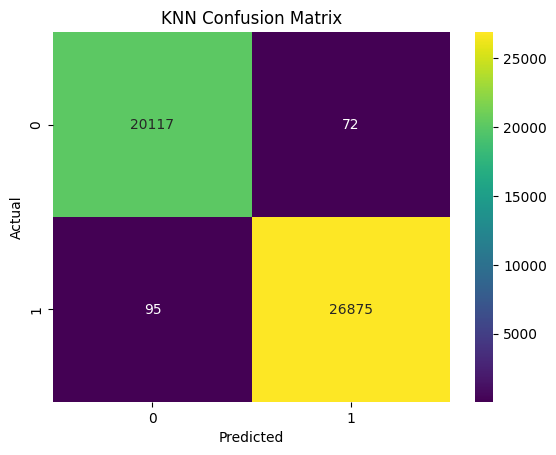

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='viridis')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression

Logistic Regression Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



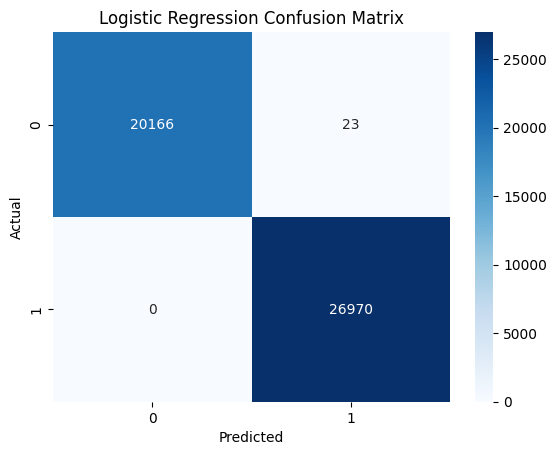

In [72]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()